## Study Pandas with Uber Dataset

### 📦 Homework Preparation

Before you begin, please make sure to:

1. **Import the required libraries** (e.g., `pandas`, `numpy`, `matplotlib`).
2. **Read the CSV file** in the data folder (e.g.cust.csv, driver.csv)
3. **Understand your data** (e.g. What does the dataframe look like? what is its dimension? what are the columns?)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_cust = pd.read_csv('./data/cust.csv')
df_driver = pd.read_csv('./data/driver.csv')
print(df_cust.columns)
print(df_driver.columns)

Index(['cust_id', 'trip_date', 'trip_distance', 'trip_duration', 'trip_fare',
       'trip_tips', 'trip_wait_time', 'trip_rating', 'pri_id', 'cust_name',
       'trip_id', 'driver_id'],
      dtype='object')
Index(['driver_id', 'vehicle', 'test_control'], dtype='object')


### 🧠 Section 1: Know Your Customers

**Objective:**  
Get familar with slice, dice, filter with Pandas

**Tips:**  
- loc (label based), iloc (integer position based)
- condition selection (e.g., isin)

**Queston Set 1:**  
- set the 'trip_id' as the index for cust table
- get the customer names in the even rows from cust table
- get the customer names with trip_id in ['T100','T200']
- get names of customers who paid tips > 30%
- get customer names that have letter 'J' or 'K' in it.
- get the average tips customer 'Sandra Jordan' paid to driver
- get customer_names who ever gave driver a rating of 1, 3, or 5
- create some noise for the data by randomly regerating the trip_rating for customer 'Sandra Jordan'. Note: rating is from 1 to 5

df_cust = df_cust.set_index('trip_id')

In [2]:
df_cust.iloc[::2].cust_name.drop_duplicates()

0       Jason Cunningham
22        Danielle Cross
40          Ashley Small
60      Victoria Roberts
86         Johnny Fowler
              ...       
1628     Mr. Robert Cook
1646        Arthur Moore
1670     Courtney Murphy
1696       Anthony Lopez
1718        Shawn Morris
Name: cust_name, Length: 99, dtype: object

In [8]:
df_cust[df_cust.trip_id.isin(['T100', 'T200'])].cust_name.drop_duplicates()

99     Johnny Fowler
199      Anna Lawson
Name: cust_name, dtype: object

In [9]:
df_cust[df_cust['trip_tips']/df_cust['trip_fare'] > 0.3].cust_name.drop_duplicates()

3       Jason Cunningham
22        Danielle Cross
39          Ashley Small
71      Victoria Roberts
86         Johnny Fowler
              ...       
1628     Mr. Robert Cook
1648        Arthur Moore
1670     Courtney Murphy
1698       Anthony Lopez
1718        Shawn Morris
Name: cust_name, Length: 92, dtype: object

In [16]:
df_cust[df_cust.cust_name.str.contains('J|K',regex=True)].cust_name.drop_duplicates()

0        Jason Cunningham
86          Johnny Fowler
116           Kari Turner
186             John Soto
207         Michael James
264          Luke Johnson
274        Kyle Hernandez
276     Jordan Richardson
358          Brian Kelley
405           Jake Miller
441           Kara Morgan
458        Keith Gonzales
484          Kenneth Hill
491           James Reyes
511          Justin Price
624          Tamara Jones
670        Kevin Peterson
723           Robert Kerr
808        Kristina Lopez
846        Arthur Johnson
868           Jasmine Lee
910      Nicholas Krueger
966        Robert Jackson
1003        Jennifer Shea
1016           Kyle Smith
1086      Justin Thompson
1205         Joseph Mills
1223           Jaime Shaw
1404         Justin Clark
1426        Jeffrey Baker
1450        Casey Jackson
1461      Johnathan Glass
1502         Neil Johnson
1556      Jessica Chapman
1565          Jaime Smith
1586        Joshua Lawson
Name: cust_name, dtype: object

In [19]:
df_cust[df_cust['cust_name']=='Jasmine Lee']['trip_tips'].mean()

np.float64(5.14764705882353)

In [22]:
df_cust[df_cust['trip_rating'].isin([1,3,5])].cust_name.unique()

array(['Jason Cunningham', 'Danielle Cross', 'Ashley Small',
       'Victoria Roberts', 'Johnny Fowler', 'Kari Turner', 'Amy Zavala',
       'Cameron White', 'Robert Flynn', 'Anna Lawson', 'Michael James',
       'Stephen Ryan', 'Corey Reyes', 'Luke Johnson', 'Kyle Hernandez',
       'Jordan Richardson', 'Tamara Henderson', 'Patricia Baker',
       'Brian Kelley', 'Teresa Hunter', 'Jake Miller', 'Linda Hall',
       'Michael Williams', 'Kara Morgan', 'Keith Gonzales', 'Scott Cooke',
       'Kenneth Hill', 'James Reyes', 'Justin Price', 'Mindy Williams',
       'Andrea Reed', 'Manuel Scott', 'Benjamin Young', 'Lisa Barron',
       'Tamara Jones', 'Bruce Parsons', 'Kevin Peterson',
       'Shannon Hanson', 'Lauren Brown', 'Robert Kerr',
       'Monica Carpenter', 'Christopher David', 'Paul Pruitt',
       'Kristina Lopez', 'Aaron Sanchez', 'Paul Green', 'Arthur Johnson',
       'Jasmine Lee', 'Ronald Rivera', 'Nicholas Krueger',
       'Angela Aguirre', 'Melanie Green', 'Steven Clark',
 

In [ ]:
df_cust['trip_rating'] = np.where(df_cust['cust_name']=='Jasmine Lee', np.random.choice([1,3,5]), df_cust['trip_rating'])

### 🧠 Section 2: Know the Statistics

**Objective:**  
Get familar with table summary statistics such as count, unique value, missing, mean, median, max

**Tips:**  
- isna(), describe()
- count(), sum()

**Queston Set 2:**  
- how many unique customers (cust_id) are there? 
- let's say an uber account can be shared whitin a household (e.g., a cust_id can be associated with a pri_id, indicating they belong to a same househod). how many unique households are there in the data? 
- what is % of trips is booked from secondary holder?
- can you show the data type for each column?
- for each numerical column, can you output the min, max, 99% percentile, 1% percentile, count (how many rows), valid rows (non missing rows)?
- for driver.csv table, can you calculate the % of test group over total population?

In [3]:
df_cust.cust_id.nunique()

100

In [ ]:
df_cust[df_cust['pri_id'].isnull()].cust_id.nunique()

60

In [22]:
df_cust[~df_cust['pri_id'].isnull()]['trip_id'].count()/df_cust['trip_id'].count()

np.float64(0.3559516963772283)

In [23]:
df_cust.dtypes


cust_id             int64
trip_date          object
trip_distance     float64
trip_duration     float64
trip_fare         float64
trip_tips         float64
trip_wait_time    float64
trip_rating       float64
pri_id            float64
cust_name          object
trip_id            object
driver_id           int64
dtype: object

In [27]:
numvars = ['trip_distance', 'trip_duration','trip_fare', 'trip_tips', 'trip_wait_time', 'trip_rating']
df_cust[numvars].describe(percentiles=[.01, .99])

,trip_distance,trip_duration,trip_fare,trip_tips,trip_wait_time,trip_rating
count,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1571.000000
mean,5.051219,5.678143,27.629132,4.779482,2.937895,3.537874
std,4.819995,6.062930,12.651035,2.878790,2.953932,1.258980
min,0.000000,0.000000,5.010000,0.010000,0.000000,1.000000
1%,0.063800,0.060000,5.595200,0.100000,0.000000,1.000000
50%,3.670000,3.810000,27.530000,4.640000,2.000000,4.000000
99%,21.753000,28.293200,49.468600,9.840000,13.000000,5.000000
max,37.210000,67.880000,49.990000,9.990000,22.000000,5.000000


In [31]:
df_driver[df_driver['test_control']==True]['driver_id'].nunique()/ df_driver['driver_id'].nunique()


0.5

### 🧠 Section 3: Know how to merge two tables

**Objective:**  
Get familiar with table join (e.g., inner join, left join, right join)

**Tips:**  
- concat()
- merge()

**Queston Set 3a:**  
- You found that there is a record missing from driver.csv table. Can you add it back to the driver table after your read the local file? The record is  driver_id (160), vehicle('BMW'), test_control(False)

In [34]:
df_missing = pd.DataFrame(columns=['driver_id', 'vehicle', 'test_control']
                          , data = [[160, 'BMW', False]])

df_driver = pd.concat([df_driver, df_missing], ignore_index=True)

**Queston Set 3b:**  
- Based on the two tables (cust and driver tables), can you figure out how many trips every driver made in the past? Note: if there is no trip made, it should be indicated as zero.

In [40]:
df = df_driver.merge(df_cust, on='driver_id', how='left')
df.groupby('driver_id')['trip_id'].count().reset_index()

,driver_id,trip_id
0,1,9
1,2,11
2,3,12
3,4,14
4,5,11
...,...,...
146,147,13
147,148,16
148,149,18
149,150,9


**Queston Set 3c:**  
- Based on the two tables (cust and driver tables), can you figure out which vehicle is mostly selected by uber customers?

In [47]:
vehicle_counts = pd.DataFrame(df.groupby(['vehicle'])['trip_id'].count()).reset_index()
vehicle_counts.columns = ['vehicle', 'count']
vehicle_counts.sort_values(by=['count'], ascending=False)

,vehicle,count
1,Chevrolet,373
3,Honda,307
2,Ford,282
4,Nissan,281
6,Toyota,256
5,Telsa,240
0,BMW,0


### 🧠 Section 4: Know how to group

**Objective:**  
Get familiar with grouping

**Tips:**  
- groupby()
- apply(), transform(), lambda, agg()

**Queston Set 4a:**  
- customers paid different tip for each trip. can you find out which customer have the most and least variation in tips? The variation is defined as max(trip_tips)-min(trip_tips) for each customer?

In [49]:
df_tips = df.groupby(['cust_id'])['trip_tips'].agg(['max', 'min']).reset_index()
df_tips['variation'] = df_tips['max'] - df_tips['min']
df_tips_range = df_tips.sort_values(by=['variation'], ascending=False)
print(df_tips_range.head(1), df_tips_range.tail(1))

    cust_id   max   min  variation
72     73.0  9.97  0.08       9.89     cust_id   max   min  variation
73     74.0  6.67  6.67        0.0


**Queston Set 4b:**  
- figure out the total trip fare by test and control group
- figure out the contribution of each trip (% of each trip fare to total fare), segmented by test and control group

In [50]:
df['trip_total_fare'] = df['trip_fare'] + df['trip_tips']
df.groupby(['test_control'])['trip_total_fare'].mean()

test_control
False    32.491797
True     32.323593
Name: trip_total_fare, dtype: float64

In [51]:
df.groupby(['test_control'])['trip_fare'].mean()

test_control
False    27.764960
True     27.490302
Name: trip_fare, dtype: float64

In [52]:
df.groupby(['test_control'])['trip_tips'].mean()

test_control
False    4.726837
True     4.833291
Name: trip_tips, dtype: float64

**Queston Set 4c:**  
- customer can select a driver more than once in the data. can you figure out how many unique cust-driver pair in the table?

In [53]:
df['customer_driver_pair'] = df['cust_id'].astype(str) + '_' + df['driver_id'].astype(str)
df['customer_driver_pair'].nunique()

1597

**Queston Set 4d:**  
- not every customer paid tips in each trip. can you calculate the total number of tipping event per customer.

In [55]:
df_cust[df_cust['trip_tips']>0].groupby(['cust_id'])['trip_id'].count()

cust_id
1      21
2      18
3      20
4      27
5      30
       ..
96     17
97     25
98     26
99     21
100    22
Name: trip_id, Length: 100, dtype: int64

**Question Set 4e**
- divide the customers in 10 equal bins based on trip fare, and calculate the average tips in each bin.

In [60]:
df_cust['fare_bin'] = pd.qcut(df_cust['trip_fare'], 10, labels=False)
df_cust.groupby(['fare_bin'])['trip_tips'].mean()

fare_bin
0    4.443486
1    5.212659
2    5.308857
3    4.581503
4    5.136782
5    4.599943
6    4.589364
7    4.730862
8    4.612759
9    4.577759
Name: trip_tips, dtype: float64

### 🧠 Section 5: Know the time

**Objective:**  
Get familar with time time formating and time series

**Tips:**  
- to_datetime()
- shift()

**Queston Set 5a:**  
- can you calcuate the average trip fare per month, segmented by test and control group?
- can you plot the above results to show the trend?

In [82]:
df['trip_year_month'] = df['trip_date'].str[:7]
df_test = df.groupby(['test_control', 'trip_year_month'])['trip_fare'].mean()
df_test.columns = ['avg_fare']
df_test = df_test.reset_index()
df_test['trip_year_month'] = pd.to_datetime(df_test['trip_year_month'])

In [85]:
df_test.head()

,test_control,trip_year_month,trip_fare
0,False,2025-02-01,27.222113
1,False,2025-03-01,27.989164
2,False,2025-04-01,27.926436
3,False,2025-05-01,27.709730
4,True,2025-02-01,27.607407


(array([20120., 20134., 20148., 20162., 20179., 20193., 20209.]),
 [Text(20120.0, 0, '2025-02-01'),
  Text(20134.0, 0, '2025-02-15'),
  Text(20148.0, 0, '2025-03-01'),
  Text(20162.0, 0, '2025-03-15'),
  Text(20179.0, 0, '2025-04-01'),
  Text(20193.0, 0, '2025-04-15'),
  Text(20209.0, 0, '2025-05-01')])

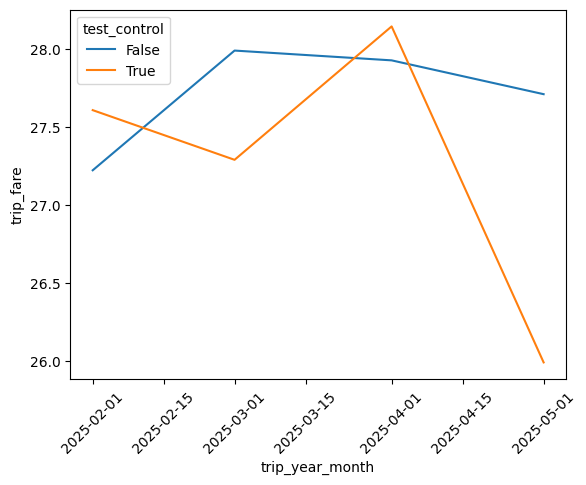

In [88]:
sns.lineplot(data=df_test, x='trip_year_month', y='trip_fare', hue='test_control')
plt.xticks(rotation=45)

**Queston Set 5b:**  
- A promising customer is defined as those that have 3 more trip fare increasing events (increase compared to last trip). Find all of them.

In [94]:
df = df.sort_values(by=['cust_id','trip_date'])
df['uptrend'] = (df['trip_fare'] > df.groupby('cust_id')['trip_fare'].shift(1)).astype(int)
df_promising = df.groupby(df['cust_id'])['uptrend'].sum().reset_index()
df_promising.columns = ['cust_id', 'uptrend_count']
df_promising[df_promising['uptrend_count'] >=3]

,cust_id,uptrend_count
0,1.0,10
1,2.0,9
2,3.0,11
3,4.0,16
4,5.0,14
...,...,...
95,96.0,8
96,97.0,12
97,98.0,12
98,99.0,10


**Queston Set 5c:**  
- lag is defined as days between current trip and previous trip. calculate the average lag for each customers

In [104]:
df['trip_date'] = pd.to_datetime(df['trip_date'])
df['lag'] = df['trip_date'] - df.groupby('cust_id')['trip_date'].shift(1)
df['lag'] = df['lag'].dt.days
df.groupby(['cust_name'])['lag'].mean().reset_index().sort_values(by='lag', ascending=False).head(10)

,cust_name,lag
69,Michael Williams,55.000000
53,Kyle Hernandez,55.000000
79,Philip Yu,44.000000
12,Bobby Welch,41.000000
38,John Soto,36.500000
80,Rachel Nguyen,28.500000
65,Melanie Green,25.666667
57,Linda Hall,16.333333
66,Melanie Harper,15.500000
20,Christopher Cole,12.428571


### 🧠 Section 6: Know Pivot Table

**Objective:**  
Get familar with pivot table

**Tips:**  
- pivot()

**Queston Set 6:**  
- pivot the table so that the columns of the new table are ['test','control'], and the index is vehicle type. The values in the table should be the trip distance.

In [108]:
df_by_assignment = pd.pivot_table(df, index='vehicle', columns='test_control', values='trip_distance', aggfunc='sum')
df_by_assignment = df_by_assignment.reset_index()
df_by_assignment.columns = ['vehicle', 'control', 'test']
df_by_assignment

,vehicle,control,test
0,BMW,0.00,NaN
1,Chevrolet,883.34,992.48
2,Ford,625.95,828.92
3,Honda,980.70,577.90
4,Nissan,613.79,754.86
5,Telsa,537.56,639.02
6,Toyota,916.19,433.36


### 🧠 Section 7: Numpy

**Objective:**  
Get familar with numpy and simulation

**Tips:**  
- numpy.random

**Question Set 7**
- calculate average and standard deviation of tips by bootstrapping (tips: do 100 experiments, sample 50% of the population in each experiment, and calculate mean)
- assign a probability for each trip from a uniform distribution. if the p > 0.5, select the row.

In [ ]:
bootstrap_n = 100
tip_means = []
for i in range(bootstrap_n):
    df_sample = df.sample(frac=0.5, random_state=42, replace=True)
    tip_means.append(df_sample['trip_tips'].mean())

print(f'{np.mean(tip_means):.2f}, {np.std(tip_means):.2f}')


4.82, 0.00


In [112]:
df['prob'] = np.random.uniform(0, 1, size=len(df))
selected = df[df['prob'] > 0.5]
selected

,driver_id,vehicle,test_control,cust_id,trip_date,trip_distance,trip_duration,trip_fare,trip_tips,trip_wait_time,trip_rating,pri_id,cust_name,trip_id,trip_total_fare,customer_driver_pair,trip_year_month,uptrend,lag,prob
1185,101,Nissan,False,1.0,2025-02-14,0.30,0.22,36.86,6.01,0.0,NaN,80.0,Jason Cunningham,T2,42.87,1.0_101,2025-02,1,1.0,0.736778
856,73,Honda,False,1.0,2025-02-21,8.93,12.54,13.25,1.82,1.0,4.0,80.0,Jason Cunningham,T3,15.07,1.0_73,2025-02,0,7.0,0.710824
1129,96,Chevrolet,False,1.0,2025-03-09,0.17,0.12,34.81,2.59,1.0,4.0,80.0,Jason Cunningham,T8,37.40,1.0_96,2025-03,1,2.0,0.849293
837,71,Telsa,False,1.0,2025-03-10,3.96,5.78,39.88,9.70,8.0,5.0,80.0,Jason Cunningham,T9,49.58,1.0_71,2025-03,1,1.0,0.866102
426,34,Chevrolet,False,1.0,2025-03-13,2.46,3.19,21.05,8.29,1.0,4.0,80.0,Jason Cunningham,T11,29.34,1.0_34,2025-03,1,2.0,0.731268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,110,Ford,True,100.0,2025-03-29,15.81,11.56,22.11,0.02,5.0,4.0,42.0,Shawn Morris,T1728,22.13,100.0_110,2025-03,0,1.0,0.668056
903,76,Nissan,False,100.0,2025-04-11,29.98,30.18,28.09,1.78,5.0,5.0,42.0,Shawn Morris,T1730,29.87,100.0_76,2025-04,0,11.0,0.945390
1088,91,Honda,False,100.0,2025-04-18,0.70,0.47,45.20,8.68,7.0,4.0,42.0,Shawn Morris,T1732,53.88,100.0_91,2025-04,1,3.0,0.750438
1220,103,Toyota,True,100.0,2025-05-04,5.98,10.27,30.17,4.18,1.0,4.0,42.0,Shawn Morris,T1737,34.35,100.0_103,2025-05,1,3.0,0.993702
